In [1]:
import json
import pandas as pd 
import jieba

df = pd.read_csv("articles_of_ Toyota.csv").astype(str)


In [2]:
df

,board,article_sub,article_id,main_link,viewed,timestamp,main_content,all_replies,all_replies_f
0,Toyota,現在買車好還是年底買好呢？,6152938,https://www.mobile01.com/topicdetail.php?f=264...,2277,2020-07-28 21:30,昨天心血來潮去看了altis油電版空車折價就8萬真的心動，但是礙於白色車已經沒了😓😓。雖然也...,"不急買車又不常換車的話,年底買車優惠大.|年底買,如果是掛今年底的車那明年就變成2年車,2手...","#2#不急買車又不常換車的話,年底買車優惠大.|#3#年底買,如果是掛今年底的車那明年就變成..."
1,Toyota,汽車防撞邊條,6152953,https://www.mobile01.com/topicdetail.php?f=264...,4422,2020-07-28 21:48,半年前加裝防撞邊條，結果今天去洗車鍍膜保養，拆下來時老闆說因嚴重藏汙納垢（邊條裡面容易留水（...,我的車跟你一樣，但我只裝三個月，就咬漆了。我之前有問過洗車的，因為已經咬漆等於沒救了。|這沒...,#2#我的車跟你一樣，但我只裝三個月，就咬漆了。我之前有問過洗車的，因為已經咬漆等於沒救了。...
2,Toyota,2021 Toyota Corolla Sport 最大變動之處,6153383,https://www.mobile01.com/topicdetail.php?f=264...,1606,2020-07-29 12:54,這兩天看到不少車媒開始丟出2021ToyotaCorollaSport的新車影片這間媒體膽子...,和泰關心您|聽說會把Yaris那顆1.6t，馬力272ps裝上去大家再等一下下應該2028年...,#2#和泰關心您|#3#聽說會把Yaris那顆1.6t，馬力272ps裝上去大家再等一下下應...
3,Toyota,17年 vios,6152067,https://www.mobile01.com/topicdetail.php?f=264...,1089,2020-07-27 22:47,有人能介紹台中或彰化安裝安卓機的車廠嗎車是2017vios,雖然不認這地區的廠商，但建議可以順便將胎壓偵測器裝起來.|,#2#雖然不認這地區的廠商，但建議可以順便將胎壓偵測器裝起來.|
4,Toyota,[活動] 2020 RAV4 DAY 第一屆全國大會師,6152599,https://www.mobile01.com/topicdetail.php?f=264...,7612,2020-07-28 14:37,RAV4DAY大會師開跑瞜!!!親愛的RAV45代車友們我們將在今年2020/9/19（六）...,有限定年式嗎？|有限定年式嗎？|吐槽一下這台車一上路就是在參加車聚了|哇！！感覺不錯玩也頂一...,#2#有限定年式嗎？|#3#有限定年式嗎？|#4#吐槽一下這台車一上路就是在參加車聚了|#5...
...,...,...,...,...,...,...,...,...,...
38263,Toyota,Altis是不是要小改款了,6153691,https://www.mobile01.com/topicdetail.php?f=264...,14212,2020-07-29 20:05,最近看altis感覺殺很兇除了競賽月以外會不會是明年altis就要小改款趕快清庫存或是幫CC...,有可能，中南部議價空間不多，油電還能殺到省10W以上|對啊看到都嚇一跳|看和泰這些高層什麼時...,#2#有可能，中南部議價空間不多，油電還能殺到省10W以上|#3#對啊看到都嚇一跳|#4#看...
38264,Toyota,Altis引擎故障燈 抖動 更換考爾,6159910,https://www.mobile01.com/topicdetail.php?f=264...,18084,2020-08-07 10:27,前些日子已10年14萬公里的10.5代altis停等紅燈時突然車身頓了一下，引擎故障燈亮起接...,考爾換掉壞的就可以了，不需要四隻全部換掉。一隻一隻拔掉考爾接頭測試，哪一隻拔掉時沒有抖得更厲...,#2#考爾換掉壞的就可以了，不需要四隻全部換掉。一隻一隻拔掉考爾接頭測試，哪一隻拔掉時沒有抖...
38265,Toyota,[間諜照] 臺灣環保標章露餡，國產Toyota Corolla Cross無偽裝首度現身,6154364,https://www.mobile01.com/topicdetail.php?f=264...,31262,2020-07-30 17:36,各式間諜照滿天飛啊！！！第四季就快到了，大家再等等 --------於2020年7月9日在泰...,不知到頂規有沒有可能給電子手煞車或是跟泰規依樣是腳踩手煞車|可惜了沒有Hybrid4WD的車...,#2#不知到頂規有沒有可能給電子手煞車或是跟泰規依樣是腳踩手煞車|#3#可惜了沒有Hybri...
38266,Toyota,【採訪】Toyota 小改款 Hilux 145 萬元正式上市，猛漢皮卡全面進化！,6153611,https://www.mobile01.com/topicdetail.php?f=264...,26214,2020-07-29 17:42,Toyota原廠於今年六月所推出的小改款Hilux於今日正式在台上市，採取單一車系編成，正式...,好帥，又有ACC。有被打動...攝影人的份量來自於作品\r而不是相機與鏡頭\rMyFlick...,#2#好帥，又有ACC。有被打動...攝影人的份量來自於作品\r而不是相機與鏡頭\rMyFl...


In [3]:
df2 = df.loc[:,['article_sub','main_content','all_replies']]

In [4]:
df2

,article_sub,main_content,all_replies
0,現在買車好還是年底買好呢？,昨天心血來潮去看了altis油電版空車折價就8萬真的心動，但是礙於白色車已經沒了😓😓。雖然也...,"不急買車又不常換車的話,年底買車優惠大.|年底買,如果是掛今年底的車那明年就變成2年車,2手..."
1,汽車防撞邊條,半年前加裝防撞邊條，結果今天去洗車鍍膜保養，拆下來時老闆說因嚴重藏汙納垢（邊條裡面容易留水（...,我的車跟你一樣，但我只裝三個月，就咬漆了。我之前有問過洗車的，因為已經咬漆等於沒救了。|這沒...
2,2021 Toyota Corolla Sport 最大變動之處,這兩天看到不少車媒開始丟出2021ToyotaCorollaSport的新車影片這間媒體膽子...,和泰關心您|聽說會把Yaris那顆1.6t，馬力272ps裝上去大家再等一下下應該2028年...
3,17年 vios,有人能介紹台中或彰化安裝安卓機的車廠嗎車是2017vios,雖然不認這地區的廠商，但建議可以順便將胎壓偵測器裝起來.|
4,[活動] 2020 RAV4 DAY 第一屆全國大會師,RAV4DAY大會師開跑瞜!!!親愛的RAV45代車友們我們將在今年2020/9/19（六）...,有限定年式嗎？|有限定年式嗎？|吐槽一下這台車一上路就是在參加車聚了|哇！！感覺不錯玩也頂一...
...,...,...,...
38263,Altis是不是要小改款了,最近看altis感覺殺很兇除了競賽月以外會不會是明年altis就要小改款趕快清庫存或是幫CC...,有可能，中南部議價空間不多，油電還能殺到省10W以上|對啊看到都嚇一跳|看和泰這些高層什麼時...
38264,Altis引擎故障燈 抖動 更換考爾,前些日子已10年14萬公里的10.5代altis停等紅燈時突然車身頓了一下，引擎故障燈亮起接...,考爾換掉壞的就可以了，不需要四隻全部換掉。一隻一隻拔掉考爾接頭測試，哪一隻拔掉時沒有抖得更厲...
38265,[間諜照] 臺灣環保標章露餡，國產Toyota Corolla Cross無偽裝首度現身,各式間諜照滿天飛啊！！！第四季就快到了，大家再等等 --------於2020年7月9日在泰...,不知到頂規有沒有可能給電子手煞車或是跟泰規依樣是腳踩手煞車|可惜了沒有Hybrid4WD的車...
38266,【採訪】Toyota 小改款 Hilux 145 萬元正式上市，猛漢皮卡全面進化！,Toyota原廠於今年六月所推出的小改款Hilux於今日正式在台上市，採取單一車系編成，正式...,好帥，又有ACC。有被打動...攝影人的份量來自於作品\r而不是相機與鏡頭\rMyFlick...


In [5]:
df_altis1 = df2.loc[df2.article_sub.str.lower().str.contains('altis|神a').fillna(False)]
df_altis2 = df2.loc[df2.main_content.str.lower().str.contains('altis|神a').fillna(False)]
df_altis3 = df2.loc[df2.all_replies.str.lower().str.contains('altis|神a').fillna(False)]
df_altis = pd.concat([df_altis1, df_altis2],ignore_index=True)
df_altis = pd.concat([df_altis, df_altis3],ignore_index=True)
df_altis = df_altis.drop_duplicates()
df_altis



,article_sub,main_content,all_replies
0,#情報 #TOYOTA女神張景嵐ALTIS試駕會,雖然ALTISHYBRID上市已經1年多，但好像去看看張景嵐也很不錯啦哈哈哈😂報名連結：y2...,nan
1,Toyota Altis 燃油泵召回紀錄,沒想到我也中獎了施工整個過程大約一個小時更換完第一次發動會發動不順是正常的順便做20000公...,覺得你的牌才是亮點誒|昏倒|我還沒收到通知單，但昨天剛3萬定保原廠不會順便處裡..下次還要再...
2,［分享］這才是負責任的大公司，果然第一名沒讓人失望！「自主安全性召回」來敲門~Altis C...,如題，和泰貼心地主動來函通知，預約也很順利！又可以放鬆心情去喝咖啡了！~對象有國產Altis...,回廠後專員會跟你說碟盤磨損了，該換新的了，輪胎也磨損了建議更換，再加裝個奈米空氣濾清器，這個...
3,歐規GR Sport神A亮相！,歐規版並未對底盤進行升級，動力選擇有1.6汽油及1.8油電，而台版有針對懸吊進行調整；歐規外...,甚麼規都一樣，我們還是只有台規能買!|鋁圈？？？難啦~~和泰這些「無基本美學」的高層太多了看...
4,想詢問二手 Toyota Altis 價格,最近想入手ToyotaAltis想請問201311代經典版里程11萬7公里想問以這台車價個差...,經典版當初牌價：68.9萬.若打折個價，領牌+保險湊成整數約莫：65萬左右.買新車會談的，當...
...,...,...,...
26841,台灣依舊是車美仕主機！日規新年式Toyota RAV4導入Display Audio系統,又是車美仕...又是車美仕...看得到吃不到心情真差....------日本Toyota率先...,"車美仕是自己的啊想""導入""難啊...把握當下、愛要即時；勿以惡小而為之、勿以善小而不為。|車..."
26842,Toyota Yaris 第四代改款,請問這台會在台灣上市嗎？ToyotaYaris第四代改款1763821,台灣跟亞規，不跟日歐規，目前亞規的大改款還遙遙無期。|完全不可能，除非和泰這些人全部下台不然...
26844,戰力分析，5代Rav4表現可圈可點,三強評比，舒適乘適性極佳噪音難免果然表現不錯，難怪銷售第一。,價格都一樣當然選進口車Rav4還是休旅車首選|品牌，進口，配備，價格，所以賣的最好。|我怎麼...
26851,【採訪】Toyota 小改款 Hilux 145 萬元正式上市，猛漢皮卡全面進化！,Toyota原廠於今年六月所推出的小改款Hilux於今日正式在台上市，採取單一車系編成，正式...,好帥，又有ACC。有被打動...攝影人的份量來自於作品\r而不是相機與鏡頭\rMyFlick...


In [6]:
a = df_altis['article_sub'].tolist()
b = df_altis['main_content'].tolist()
c = df_altis['all_replies'].tolist()

In [7]:
d = a +b +c 
d

['#情報 #TOYOTA女神張景嵐ALTIS試駕會',
 'Toyota Altis 燃油泵召回紀錄',
 '［分享］這才是負責任的大公司，果然第一名沒讓人失望！「自主安全性召回」來敲門~Altis Camry Alphard Prado',
 '歐規GR Sport神A亮相！',
 '想詢問二手 Toyota Altis 價格',
 '12代神A TNGA神一般的操控性能不容質疑？！',
 '2006 Altis 排檔膠套更換',
 '新altis油車，高速公路1公升可以跑多少公里呢？',
 '國產車銷售指標 TOYOTA Altis 上半年掛牌數:15,466輛！(上半年國產車僅5款正成長 這兩款真的老當益壯)',
 'Altis10.5引擎故障燈、ABS故障燈亮，熄火10分鐘恢復熄滅燈號',
 '麻煩介紹ALTIS高雄維修廠',
 '2010年Toyota Corolla Altis 1.8E 持有10年養車成本分析',
 'Altis 12代 後座頭枕',
 'toyota altis 2003 鎖起來了....',
 '12代Altis外場車機疑問',
 '2014 altis 烤漆方式選擇',
 '【預覽台灣版本】Toyota Corolla Cross泰國版售價、配備完整公開，預估國產版售價略高於Altis',
 '詢問altis 12代 後照鏡外殼殺肉哪裡有?',
 '請問altis gr 大包能裝在一般altis 12代上嗎',
 '第一次買新車該買ALTIS嗎???',
 '選擇困難：altis 12代及11代',
 'ALTIS的米色內裝清潔',
 '2001 ALTIS車速超過100KM時ABS燈會亮',
 'TOYOTA Altis 汽油版 GR SPORT 菜單請益(已購車 謝謝)',
 '12代 ALTIS 原廠有起步自動鎖門功能嗎 ?',
 'altis 六角中控鎖',
 'altis kyb 黑筒搭配短彈簧',
 'Altis 12代 頓挫/抖動',
 '分享2014年Altis冷氣 電磁閥不好拆的問題',
 'GR SPORT Altis，試駕打臉!!!',
 'Prius, Prius PHV及Altis GR油電該如何選？',
 'Altis、Corolla Cross、Rav4誰會是銷售王？',
 '法規調整，買Altis

In [8]:
import jieba
import jieba.analyse
jieba.set_dictionary('2019_nlp/work/jieba_data/dict.txt.big')
jieba.load_userdict('user_dict.txt')
jieba.analyse.set_stop_words('stop_words.txt')
with open('stop_words.txt','r',encoding='utf-8') as f:
    stop_words = f.readlines()
stop_words = [stop_word.rstrip() for stop_word in stop_words]

Building prefix dict from C:\Users\Big data\PycharmProjects\ML\2019_nlp\work\jieba_data\dict.txt.big ...
Loading model from cache C:\Users\BIGDAT~1\AppData\Local\Temp\jieba.u7e5ede7d13e28a02b4816b4304f4dd00.cache
Loading model cost 1.091 seconds.
Prefix dict has been built successfully.


In [9]:
seg = []
jieba.enable_paddle()
for i in range(len(d)):
    #cut_list = list( jieba.cut_for_search(fileAllLines[i]) )
    cut_list = list( jieba.cut(d[i], cut_all = False) )
    cut_list = [w for w in cut_list if w not in stop_words]
    seg.append([' '.join([ item for item in cut_list if len(item) > 1 ])])

Paddle enabled successfully......


In [10]:
print(len(seg))

48057


In [11]:
seg = [ s for s in seg if len(s) > 0] 

In [12]:
# 斷詞結果存檔
segSaveFile = 'AltisDone.txt'
with open(segSaveFile, 'wb') as saveFile:
    for i in range(len(seg)):
        words = seg[i][0].encode('utf-8')
        words = words.strip()
        if len(words) > 0:
            #saveFile.write(seg[i][0].encode('utf-8'))
            saveFile.write(words)
            saveFile.write('\n'.encode())

In [13]:
from gensim.models import word2vec
sentences = word2vec.LineSentence("AltisDone.txt")

In [14]:
import time
start_time = time.time()
model = word2vec.Word2Vec(sentences, size=300, iter=150, sg=0, window=15, workers=3)
print("--- spend %s seconds ---" % (time.time() - start_time))

--- spend 2035.3890194892883 seconds ---


In [15]:
model.save("word2vec_Altis.model")

In [16]:
model.corpus_total_words

9926737

In [17]:
model.wv.most_similar('Altis')

[('Vios', 0.4851905405521393),
 ('altis', 0.4840083122253418),
 ('Focus', 0.46711164712905884),
 ('Yaris', 0.45974433422088623),
 ('Camry', 0.4560062289237976),
 ('Wish', 0.44355931878089905),
 ('ALTIS', 0.43146562576293945),
 ('New', 0.4066663384437561),
 ('Sentra', 0.3988133668899536),
 ('Tiida', 0.39719510078430176)]

In [18]:
model.wv.similar_by_word('省油')

[('耗油', 0.6054021120071411),
 ('油耗', 0.6008392572402954),
 ('市區', 0.48904508352279663),
 ('油性', 0.47811657190322876),
 ('油錢', 0.4696972072124481),
 ('順順', 0.42916589975357056),
 ('柴油車', 0.41987258195877075),
 ('好開', 0.40985050797462463),
 ('很省', 0.4024377763271332),
 ('優點', 0.39997899532318115)]

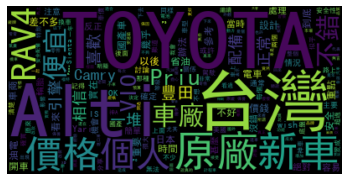

In [19]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
seg_list=" ".join('%s' %id for id in seg)
wordcloud = WordCloud(font_path='2019_nlp/work/Text_wordcloud/fonts/SimHei.ttf').generate(seg_list)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
import time
start_time = time.time()
content = open('AltisDone.txt', 'rb').read()
#斷詞，選出100個主題
tags = jieba.analyse.extract_tags(content,topK=100,withWeight=True)
print("--- spend %s seconds ---" % (time.time() - start_time))

--- spend 138.60613989830017 seconds ---


In [21]:
tags

[('原廠', 0.07107297282582431),
 ('台灣', 0.055567581529821206),
 ('保養', 0.03939852587692486),
 ('TOYOTA', 0.036813279216953564),
 ('Altis', 0.03546403131339812),
 ('引擎', 0.032900495561472946),
 ('配備', 0.030847606401504007),
 ('價格', 0.03015349872548722),
 ('新車', 0.02918540117735854),
 ('油耗', 0.02867832318526266),
 ('ALTIS', 0.028508341760050935),
 ('10', 0.027949402420942678),
 ('Toyota', 0.025945014289848585),
 ('空間', 0.023056552171406793),
 ('電車', 0.022452556719995694),
 ('不錯', 0.022110373813047066),
 ('RAV4', 0.022027567985031027),
 ('豐田', 0.021015632057364446),
 ('個人', 0.0207720855043761),
 ('系統', 0.02073068259036808),
 ('1.8', 0.020446950856136657),
 ('車廠', 0.02041407207148323),
 ('省油', 0.020060264939328103),
 ('安全', 0.019712817929344588),
 ('汽車', 0.01928523379838224),
 ('開車', 0.019197557039306437),
 ('電池', 0.018734818588628577),
 ('油電', 0.018186838844404796),
 ('喜歡', 0.017831260877041812),
 ('altis', 0.017531698616866143),
 ('保固', 0.01709330557007646),
 ('煞車', 0.0170080735279412),
 (

In [22]:
import time
start_time = time.time()
content = open('AltisDone.txt', 'rb').read()
#斷詞，選出100個主題
tags_rank = jieba.analyse.textrank(content,topK=100,withWeight=False)
print("--- spend %s seconds ---" % (time.time() - start_time))

--- spend 6078.683092594147 seconds ---


In [23]:
tags_rank

['台灣',
 '引擎',
 '油耗',
 '日本',
 '省油',
 '保固',
 '品牌',
 '相信',
 '分享',
 '交車',
 '改款',
 '造成',
 '加油',
 '神車',
 '里程',
 '汽油',
 '成本',
 '操控',
 '注意',
 '功能',
 '上市',
 '加速',
 '增加',
 '天窗',
 '不想',
 '速度',
 '好看',
 '影音',
 '妥善',
 '領牌',
 '公升',
 '福特',
 '避震器',
 '接受',
 '柴油',
 '行李箱',
 '扭力',
 '自排',
 '配件',
 '台北',
 '保桿',
 '座椅',
 '代表',
 '故障',
 '防水',
 '小心',
 '效果',
 '山路',
 '表示',
 '得到',
 '能力',
 '性能',
 '降低',
 '玻璃',
 '黑色',
 '控制',
 '改善',
 '合理',
 '可惜',
 '位置',
 '工作',
 '角度',
 '提升',
 '店家',
 '值得',
 '符合',
 '隔音',
 '踏板',
 '科技',
 '老車',
 '方面',
 '白色',
 '不行',
 '乘客',
 '定位',
 '懂車',
 '奇怪',
 '避震',
 '旅車',
 '召回',
 '特仕',
 '回覆',
 '啟動',
 '像是',
 '新款',
 '回去',
 '肯定',
 '感受',
 '耗油',
 '看車',
 '漏油',
 '事件',
 '方法',
 '程度',
 '乙式',
 '折扣',
 '失控',
 '搭配',
 '置物',
 '熄火']

In [24]:
import time
start_time = time.time()
tags_part= jieba.analyse.extract_tags(content,topK=100,withWeight=True, allowPOS=('a', 'ad', 'an', 'ag','al','n'))
# a 形容词 
# ad 副形词 
# an 名形词 
# ag 形容词性语素 
# al 形容词性惯用语
# 名词
print("--- spend %s seconds ---" % (time.time() - start_time))

--- spend 5975.282372951508 seconds ---


In [25]:
tags_part

[('引擎', 0.2651407938358888),
 ('油耗', 0.23111485846817728),
 ('省油', 0.16166305339181886),
 ('安全', 0.15886302334756588),
 ('便宜', 0.10871421588553588),
 ('交車', 0.10083421805489907),
 ('里程', 0.06993755270504899),
 ('領牌', 0.06767423529991085),
 ('神車', 0.0651227125072808),
 ('影音', 0.062465386229139296),
 ('避震器', 0.05797892213021943),
 ('品牌', 0.05245300768394317),
 ('汽油', 0.0495822547410098),
 ('扭力', 0.04892137227604561),
 ('特仕', 0.046329765784640244),
 ('天窗', 0.04476079196221407),
 ('保桿', 0.03937195940012215),
 ('行李箱', 0.03668458867024356),
 ('容易', 0.03574067672397383),
 ('老車', 0.033827304100753),
 ('旅車', 0.03352308407547788),
 ('配件', 0.033118507001894434),
 ('乙式', 0.03292445757413006),
 ('重要', 0.03279048604760853),
 ('避震', 0.03277065375513754),
 ('功能', 0.03198410729623404),
 ('座椅', 0.03184316583568348),
 ('成本', 0.031192499311075005),
 ('踏板', 0.029514277492145562),
 ('耗油', 0.029114554449731243),
 ('很大', 0.028765489940665624),
 ('柴油', 0.02787175953526475),
 ('故障', 0.02782669875973502),
 ('清楚'

In [28]:
df_altis

,article_sub,main_content,all_replies
0,#情報 #TOYOTA女神張景嵐ALTIS試駕會,雖然ALTISHYBRID上市已經1年多，但好像去看看張景嵐也很不錯啦哈哈哈😂報名連結：y2...,nan
1,Toyota Altis 燃油泵召回紀錄,沒想到我也中獎了施工整個過程大約一個小時更換完第一次發動會發動不順是正常的順便做20000公...,覺得你的牌才是亮點誒|昏倒|我還沒收到通知單，但昨天剛3萬定保原廠不會順便處裡..下次還要再...
2,［分享］這才是負責任的大公司，果然第一名沒讓人失望！「自主安全性召回」來敲門~Altis C...,如題，和泰貼心地主動來函通知，預約也很順利！又可以放鬆心情去喝咖啡了！~對象有國產Altis...,回廠後專員會跟你說碟盤磨損了，該換新的了，輪胎也磨損了建議更換，再加裝個奈米空氣濾清器，這個...
3,歐規GR Sport神A亮相！,歐規版並未對底盤進行升級，動力選擇有1.6汽油及1.8油電，而台版有針對懸吊進行調整；歐規外...,甚麼規都一樣，我們還是只有台規能買!|鋁圈？？？難啦~~和泰這些「無基本美學」的高層太多了看...
4,想詢問二手 Toyota Altis 價格,最近想入手ToyotaAltis想請問201311代經典版里程11萬7公里想問以這台車價個差...,經典版當初牌價：68.9萬.若打折個價，領牌+保險湊成整數約莫：65萬左右.買新車會談的，當...
...,...,...,...
26841,台灣依舊是車美仕主機！日規新年式Toyota RAV4導入Display Audio系統,又是車美仕...又是車美仕...看得到吃不到心情真差....------日本Toyota率先...,"車美仕是自己的啊想""導入""難啊...把握當下、愛要即時；勿以惡小而為之、勿以善小而不為。|車..."
26842,Toyota Yaris 第四代改款,請問這台會在台灣上市嗎？ToyotaYaris第四代改款1763821,台灣跟亞規，不跟日歐規，目前亞規的大改款還遙遙無期。|完全不可能，除非和泰這些人全部下台不然...
26844,戰力分析，5代Rav4表現可圈可點,三強評比，舒適乘適性極佳噪音難免果然表現不錯，難怪銷售第一。,價格都一樣當然選進口車Rav4還是休旅車首選|品牌，進口，配備，價格，所以賣的最好。|我怎麼...
26851,【採訪】Toyota 小改款 Hilux 145 萬元正式上市，猛漢皮卡全面進化！,Toyota原廠於今年六月所推出的小改款Hilux於今日正式在台上市，採取單一車系編成，正式...,好帥，又有ACC。有被打動...攝影人的份量來自於作品\r而不是相機與鏡頭\rMyFlick...


In [32]:
df_altis['new'] = df_altis['article_sub']+df_altis['main_content']+df_altis['all_replies']

In [36]:
df_altis.loc[:,['new']].iloc[0]

new    #情報 #TOYOTA女神張景嵐ALTIS試駕會雖然ALTISHYBRID上市已經1年多，但...
Name: 0, dtype: object